age: https://www.kaggle.com/vanshjatana/analysis-on-coronavirus

In [2]:
import pandas as pd 
cases = pd.read_csv("covid_19_data.csv")
import plotly.offline as py
import plotly.express as px

**Libraries**

In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
from datetime import date, timedelta
import plotly.offline as py

**Reading Data**

In [4]:
df_patient = pd.read_csv("PatientInfo.csv")

In [5]:
weather = pd.read_csv("temperature_dataframe copy.csv")

**Looking into patient data**

In [6]:
df_patient.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


1.  **id** the ID of the patient (n-th confirmed patient)
2.  **sex** the sex of the patient
3.  **birth_year** the birth year of the patient
4.  **country** the country of the patient
5.  **region** the region of the patient
6.  **group** the collective infection
7.  **infection_reason** the reason of infection
8.  **infection_order** the order of infection
9.  **infected_by** the ID of who has infected the patient
10. **contact_number** the number of contacts with people
11. **confirmed_date** the date of confirmation
12. **released_date** the date of discharge
13. **deceased_date** the date of decease
14. **state** isolated / released / deceased

In [7]:
df_patient.isna().sum()

patient_id               0
global_num            1107
sex                      6
birth_year             357
age                     13
country                  0
province                 0
city                    68
disease               2752
infection_case         928
infection_order       2740
infected_by           2121
contact_number        2254
symptom_onset_date    2382
confirmed_date           0
released_date         2062
deceased_date         2723
state                    0
dtype: int64

In [8]:
df_patient['birth_year'] = df_patient.birth_year.fillna(0.0).astype(int)
df_patient['birth_year'] = df_patient['birth_year'].map(lambda val: val if val > 0 else np.nan)

In [9]:
df_patient.confirmed_date = pd.to_datetime(df_patient.confirmed_date)
daily_count = df_patient.groupby(df_patient.confirmed_date).patient_id.count()
accumulated_count = daily_count.cumsum()

In [10]:
df_patient['age'] = 2020 - df_patient['birth_year'] 

In [11]:
import math
def group_age(age):
    if age >= 0: # not NaN
        if age % 10 != 0:
            lower = int(math.floor(age / 10.0)) * 10
            upper = int(math.ceil(age / 10.0)) * 10 - 1
            return f"{lower}-{upper}"
        else:
            lower = int(age)
            upper = int(age + 9) 
            return f"{lower}-{upper}"
    return "Unknown"


df_patient["age_range"] = df_patient["age"].apply(group_age)

In [12]:
df_patient

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,age_range
0,1000000001,2.0,male,1964.0,56.0,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,50-59
1,1000000002,5.0,male,1987.0,33.0,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released,30-39
2,1000000003,6.0,male,1964.0,56.0,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released,50-59
3,1000000004,7.0,male,1991.0,29.0,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released,20-29
4,1000000005,9.0,female,1992.0,28.0,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,7000000005,9120.0,female,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,20.0,NaN,2020-03-24,NaN,NaN,isolated,Unknown
2767,7000000006,9087.0,male,NaN,NaN,United States,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,23.0,NaN,2020-03-24,NaN,NaN,isolated,Unknown
2768,7000000007,NaN,female,1996.0,24.0,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,26.0,NaN,2020-03-25,NaN,NaN,isolated,20-29
2769,7000000008,NaN,female,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,25.0,NaN,2020-03-27,NaN,NaN,isolated,Unknown


In [13]:
patient=df_patient

**Preprocessing**

In [14]:
date_cols = ["confirmed_date", "released_date", "deceased_date"]
for col in date_cols:
    patient[col] = pd.to_datetime(patient[col])

In [15]:
patient["time_to_release_since_confirmed"] = patient["released_date"] - patient["confirmed_date"]

patient["time_to_death_since_confirmed"] = patient["deceased_date"] - patient["confirmed_date"]
patient["duration_since_confirmed"] = patient[["time_to_release_since_confirmed", "time_to_death_since_confirmed"]].min(axis=1)
patient["duration_days"] = patient["duration_since_confirmed"].dt.days
age_ranges = sorted(set([ar for ar in patient["age_range"] if ar != "Unknown"]))
patient["state_by_gender"] = patient["state"] + "_" + patient["sex"]


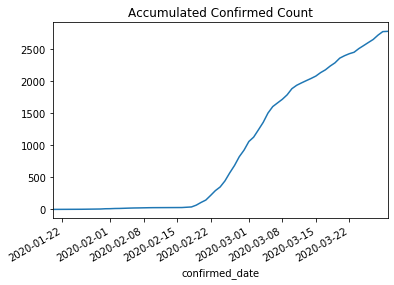

In [16]:
accumulated_count.plot()
plt.title('Accumulated Confirmed Count');

In [17]:
infected_patient = patient.shape[0]
rp = patient.loc[patient["state"] == "released"].shape[0]
dp = patient.loc[patient["state"] == "deceased"].shape[0]
ip = patient.loc[patient["state"]== "isolated"].shape[0]
rp=rp/patient.shape[0]
dp=dp/patient.shape[0]
ip=ip/patient.shape[0]
print("The percentage of recovery is "+ str(rp*100) )
print("The percentage of deceased is "+ str(dp*100) )
print("The percentage of isolated is "+ str(ip*100) )


The percentage of recovery is 31.721400216528327
The percentage of deceased is 1.912666907253699
The percentage of isolated is 66.36593287621797


**People who released**

In [18]:
released = df_patient[df_patient.state == 'released']
released.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,...,confirmed_date,released_date,deceased_date,state,age_range,time_to_release_since_confirmed,time_to_death_since_confirmed,duration_since_confirmed,duration_days,state_by_gender
0,1000000001,2.0,male,1964.0,56.0,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,...,2020-01-23,2020-02-05,NaT,released,50-59,13 days,NaT,13 days,13.0,released_male
1,1000000002,5.0,male,1987.0,33.0,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-01-30,2020-03-02,NaT,released,30-39,32 days,NaT,32 days,32.0,released_male
2,1000000003,6.0,male,1964.0,56.0,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,2020-01-30,2020-02-19,NaT,released,50-59,20 days,NaT,20 days,20.0,released_male
3,1000000004,7.0,male,1991.0,29.0,Korea,Seoul,Mapo-gu,NaN,overseas inflow,...,2020-01-30,2020-02-15,NaT,released,20-29,16 days,NaT,16 days,16.0,released_male
4,1000000005,9.0,female,1992.0,28.0,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,...,2020-01-31,2020-02-24,NaT,released,20-29,24 days,NaT,24 days,24.0,released_female


**People who are in isolated state**

In [19]:
isolated_state = df_patient[df_patient.state == 'isolated']
isolated_state.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,...,confirmed_date,released_date,deceased_date,state,age_range,time_to_release_since_confirmed,time_to_death_since_confirmed,duration_since_confirmed,duration_days,state_by_gender
14,1000000015,40.0,male,1943.0,77.0,Korea,Seoul,Seongdong-gu,NaN,Seongdong-gu APT,...,2020-02-19,NaT,NaT,isolated,70-79,NaT,NaT,NaT,NaN,isolated_male
17,1000000018,111.0,male,2000.0,20.0,Korea,Seoul,etc,NaN,etc,...,2020-02-20,NaT,NaT,isolated,20-29,NaT,NaT,NaT,NaN,isolated_male
19,1000000020,121.0,female,1944.0,76.0,Korea,Seoul,Seongdong-gu,NaN,Seongdong-gu APT,...,2020-02-20,NaT,NaT,isolated,70-79,NaT,NaT,NaT,NaN,isolated_female
21,1000000022,161.0,male,1985.0,35.0,Korea,Seoul,Seodaemun-gu,NaN,Eunpyeong St. Mary's Hospital,...,2020-02-21,NaT,NaT,isolated,30-39,NaT,NaT,NaT,NaN,isolated_male
22,1000000023,188.0,male,1961.0,59.0,Korea,Seoul,Seocho-gu,NaN,Shincheonji Church,...,2020-02-21,NaT,NaT,isolated,50-59,NaT,NaT,NaT,NaN,isolated_male


**Patient who died**

In [20]:
dead = df_patient[df_patient.state == 'deceased']
dead

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,...,confirmed_date,released_date,deceased_date,state,age_range,time_to_release_since_confirmed,time_to_death_since_confirmed,duration_since_confirmed,duration_days,state_by_gender
504,1100000071,NaN,male,1941.0,79.0,Korea,Busan,Busanjin-gu,NaN,etc,...,2020-02-28,NaT,NaT,deceased,70-79,NaT,NaT,NaT,NaN,deceased_male
528,1100000095,NaN,female,1932.0,88.0,Korea,Busan,etc,NaN,NaN,...,2020-03-13,NaT,NaT,deceased,80-89,NaT,NaT,NaT,NaN,deceased_female
530,1100000097,NaN,male,1947.0,73.0,Korea,Busan,Busanjin-gu,NaN,etc,...,2020-03-13,NaT,NaT,deceased,70-79,NaT,NaT,NaT,NaN,deceased_male
555,1200000038,38.0,female,1963.0,57.0,Korea,Daegu,Nam-gu,True,NaN,...,2020-02-18,NaT,2020-02-23,deceased,50-59,NaT,5 days,5 days,5.0,deceased_female
594,1200000114,114.0,male,1946.0,74.0,Korea,Daegu,NaN,NaN,Shincheonji Church,...,2020-02-21,NaT,2020-02-26,deceased,70-79,NaT,5 days,5 days,5.0,deceased_male
595,1200000620,620.0,male,1949.0,71.0,Korea,Daegu,NaN,NaN,NaN,...,2020-02-24,NaT,2020-03-02,deceased,70-79,NaT,7 days,7 days,7.0,deceased_male
596,1200000901,901.0,female,1934.0,86.0,Korea,Daegu,NaN,NaN,NaN,...,2020-02-25,NaT,2020-03-04,deceased,80-89,NaT,8 days,8 days,8.0,deceased_female
597,1200001064,1064.0,female,1943.0,77.0,Korea,Daegu,NaN,NaN,NaN,...,2020-02-26,NaT,2020-03-01,deceased,70-79,NaT,4 days,4 days,4.0,deceased_female
598,1200001288,1288.0,male,1955.0,65.0,Korea,Daegu,NaN,True,NaN,...,2020-02-27,NaT,2020-03-02,deceased,60-69,NaT,4 days,4 days,4.0,deceased_male
599,1200001443,1443.0,male,1945.0,75.0,Korea,Daegu,NaN,NaN,NaN,...,2020-02-27,NaT,2020-02-27,deceased,70-79,NaT,0 days,0 days,0.0,deceased_male


In [21]:
dead.isna().sum()

patient_id                          0
global_num                         14
sex                                 0
birth_year                          3
age                                 3
country                             0
province                            0
city                               19
disease                            34
infection_case                     38
infection_order                    53
infected_by                        53
contact_number                     50
symptom_onset_date                 49
confirmed_date                      0
released_date                      52
deceased_date                       5
state                               0
age_range                           0
time_to_release_since_confirmed    52
time_to_death_since_confirmed       5
duration_since_confirmed            4
duration_days                       4
state_by_gender                     0
dtype: int64

In [22]:
dead.dropna(how='all')
dead

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,...,confirmed_date,released_date,deceased_date,state,age_range,time_to_release_since_confirmed,time_to_death_since_confirmed,duration_since_confirmed,duration_days,state_by_gender
504,1100000071,NaN,male,1941.0,79.0,Korea,Busan,Busanjin-gu,NaN,etc,...,2020-02-28,NaT,NaT,deceased,70-79,NaT,NaT,NaT,NaN,deceased_male
528,1100000095,NaN,female,1932.0,88.0,Korea,Busan,etc,NaN,NaN,...,2020-03-13,NaT,NaT,deceased,80-89,NaT,NaT,NaT,NaN,deceased_female
530,1100000097,NaN,male,1947.0,73.0,Korea,Busan,Busanjin-gu,NaN,etc,...,2020-03-13,NaT,NaT,deceased,70-79,NaT,NaT,NaT,NaN,deceased_male
555,1200000038,38.0,female,1963.0,57.0,Korea,Daegu,Nam-gu,True,NaN,...,2020-02-18,NaT,2020-02-23,deceased,50-59,NaT,5 days,5 days,5.0,deceased_female
594,1200000114,114.0,male,1946.0,74.0,Korea,Daegu,NaN,NaN,Shincheonji Church,...,2020-02-21,NaT,2020-02-26,deceased,70-79,NaT,5 days,5 days,5.0,deceased_male
595,1200000620,620.0,male,1949.0,71.0,Korea,Daegu,NaN,NaN,NaN,...,2020-02-24,NaT,2020-03-02,deceased,70-79,NaT,7 days,7 days,7.0,deceased_male
596,1200000901,901.0,female,1934.0,86.0,Korea,Daegu,NaN,NaN,NaN,...,2020-02-25,NaT,2020-03-04,deceased,80-89,NaT,8 days,8 days,8.0,deceased_female
597,1200001064,1064.0,female,1943.0,77.0,Korea,Daegu,NaN,NaN,NaN,...,2020-02-26,NaT,2020-03-01,deceased,70-79,NaT,4 days,4 days,4.0,deceased_female
598,1200001288,1288.0,male,1955.0,65.0,Korea,Daegu,NaN,True,NaN,...,2020-02-27,NaT,2020-03-02,deceased,60-69,NaT,4 days,4 days,4.0,deceased_male
599,1200001443,1443.0,male,1945.0,75.0,Korea,Daegu,NaN,NaN,NaN,...,2020-02-27,NaT,2020-02-27,deceased,70-79,NaT,0 days,0 days,0.0,deceased_male


**Age distribution of the released**

/Users/ariadnacuffi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in greater

/Users/ariadnacuffi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in less



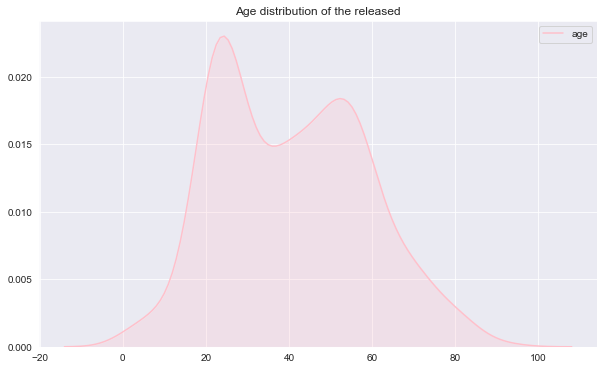

In [23]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the released")
sns.kdeplot(data=released['age'], shade=True, color="pink")

**Age distribution of isolated person**

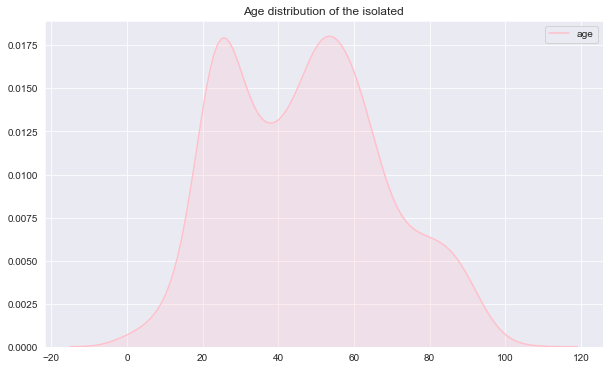

In [24]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the isolated")
sns.kdeplot(data=isolated_state['age'], shade=True, color="pink")

**Age distribution of death**

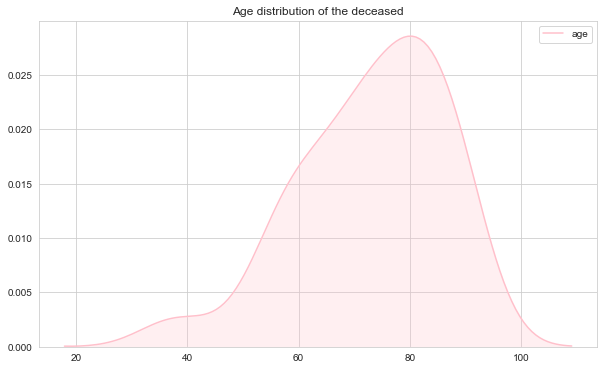

In [25]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
plt.title("Age distribution of the deceased")
sns.kdeplot(data=dead['age'], shade=True, color="pink")

In [26]:
male_dead = dead[dead.sex=='male']
female_dead = dead[dead.sex=='female']

In [27]:
male_dead.dropna

<bound method DataFrame.dropna of       patient_id  global_num   sex  birth_year   age   country  \
504   1100000071         NaN  male      1941.0  79.0     Korea   
530   1100000097         NaN  male      1947.0  73.0     Korea   
594   1200000114       114.0  male      1946.0  74.0     Korea   
595   1200000620       620.0  male      1949.0  71.0     Korea   
598   1200001288      1288.0  male      1955.0  65.0     Korea   
599   1200001443      1443.0  male      1945.0  75.0     Korea   
600   1200001921      1921.0  male      1953.0  67.0     Korea   
601   1200002085      2085.0  male      1949.0  71.0     Korea   
602   1200002289      2289.0  male      1954.0  66.0     Korea   
605   1200002936      2936.0  male      1939.0  81.0     Korea   
607   1200003578      3578.0  male      1930.0  90.0     Korea   
608   1200003896      3896.0  male      1933.0  87.0     Korea   
609   1200003914      3914.0  male      1938.0  82.0     Korea   
611   1200005767      5767.0  male      19

**Age distribution of death by gender**

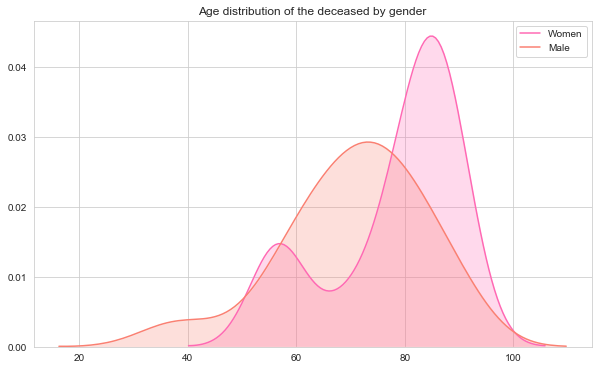

In [28]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
plt.title("Age distribution of the deceased by gender")
sns.kdeplot(data=female_dead['age'], label="Women", shade=True, color="hotpink")
sns.kdeplot(data=male_dead['age'],label="Male" ,shade=True, color="salmon")

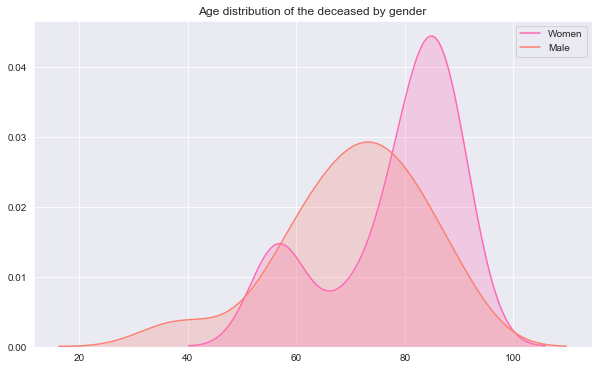

In [30]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the deceased by gender")
sns.kdeplot(data=female_dead['age'], label="Women", shade=True, color="hotpink")
sns.kdeplot(data=male_dead['age'],label="Male" ,shade=True, color="salmon")

                                      ** Age distribution of deceased **
 Here, the graph shows the age distribution of the deceased by gender. We can clearly see older people are more likely to be infected, especially older people with underlying lung disease and having problems in their respiration. The age group of 60 to 70 yr are more infected than the rest of the population. As  Dr. Steven Gambert, professor of medicine and director of geriatrics at the University of Maryland School of Medicine says “ Older people have  higher risk of underlying health conditions, older people are already under physical stress, and their immune systems, even if not significantly compromised, simply do not have the same “ability to fight viruses and bacteria”

                                    **Gender distribution of deceased **
The graph shows the age distribution of deceased gender where men are more likely to die from coronavirus  than women. New research  has found that men, particularly middle-aged and older men, are having a harder time fighting off the virus than women. Chinese researchers found that while the infection rate among men and women is the same, the death rate among men is 2.8% compared with 1.7% for women. As there are a few reasons men are more likely to die from the new coronavirus. Women have a heightened immune response. During Middle East respiratory syndrome coronavirus 32% of men died of the infection compared with 25.8% of women. 

**Comparison of released and deceased by age**

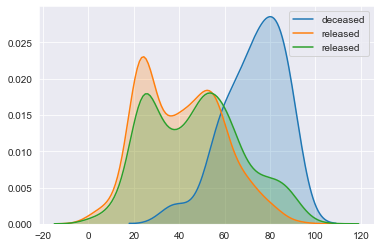

In [34]:
sns.kdeplot(data=dead['age'],label='deceased', shade=True)
sns.kdeplot(data=released['age'],label='released', shade=True)
sns.kdeplot(data=isolated_state['age'],label='released', shade=True)

**Death by gender**

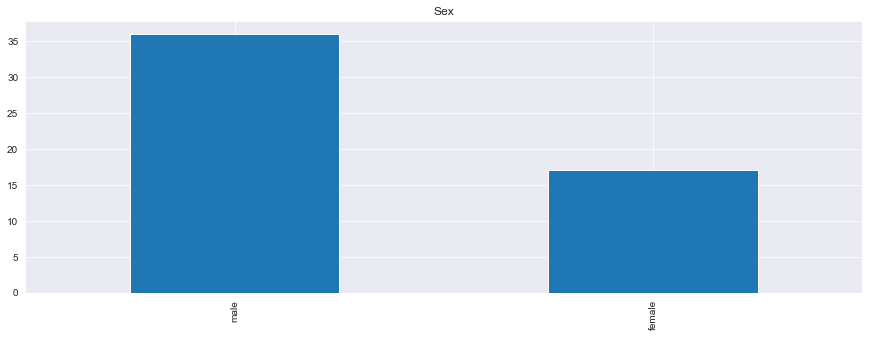

In [35]:
plt.figure(figsize=(15, 5))
plt.title('Sex')
dead.sex.value_counts().plot.bar();

In [34]:
fig = px.pie( values=dead.groupby(['sex']).size().values,names=dead.groupby(['sex']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)

**Isolation by gender**

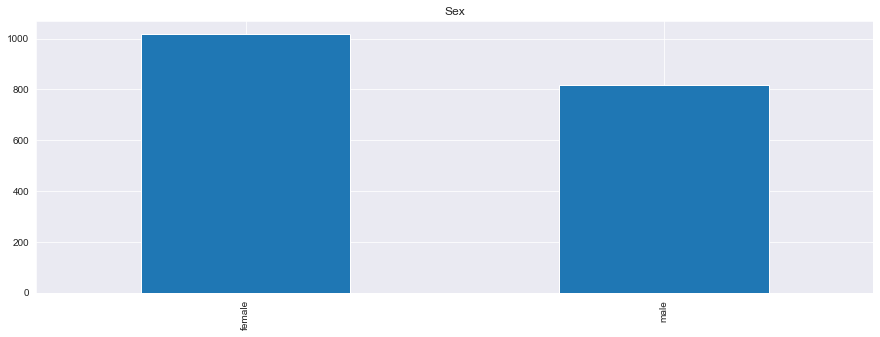

In [37]:
plt.figure(figsize=(15, 5))
plt.title('Sex')
isolated_state.sex.value_counts().plot.bar();

In [38]:
fig = px.pie( values=isolated_state.groupby(['sex']).size().values,names=isolated_state.groupby(['sex']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)

**Recovery by gender**

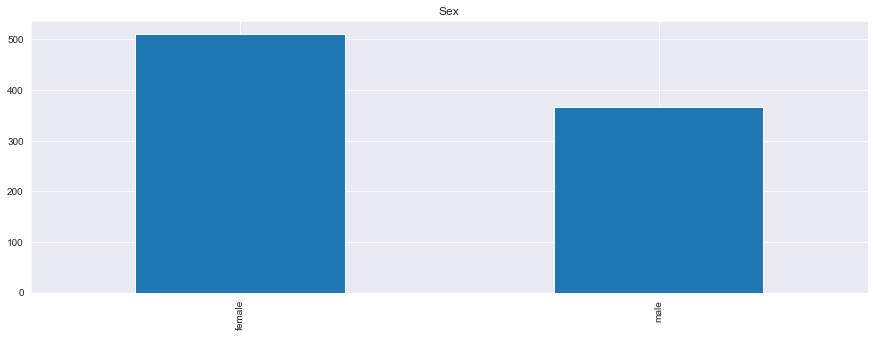

In [39]:
plt.figure(figsize=(15, 5))
plt.title('Sex')
released.sex.value_counts().plot.bar();

In [40]:
fig = px.pie( values=released.groupby(['sex']).size().values,names=released.groupby(['sex']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)

**State of male patient**

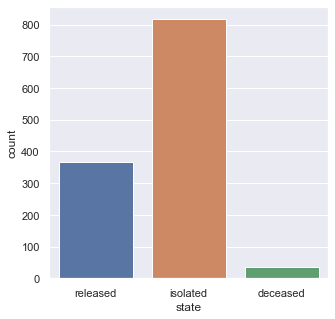

In [46]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=df_patient['state'].loc[(df_patient['sex']=="male")])

**State of female patient**

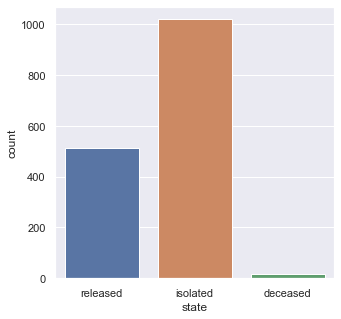

In [47]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=df_patient['state'].loc[(df_patient['sex']=="female")])

The first case of coronavirus in the country on January 20. At the moment, 31 patients were discharged from hospitals after making a full recovery from the virus and 22 deaths are reported. In total, over 105 thousand people have been tested until now. 

**State of patient(male and female) vs age **

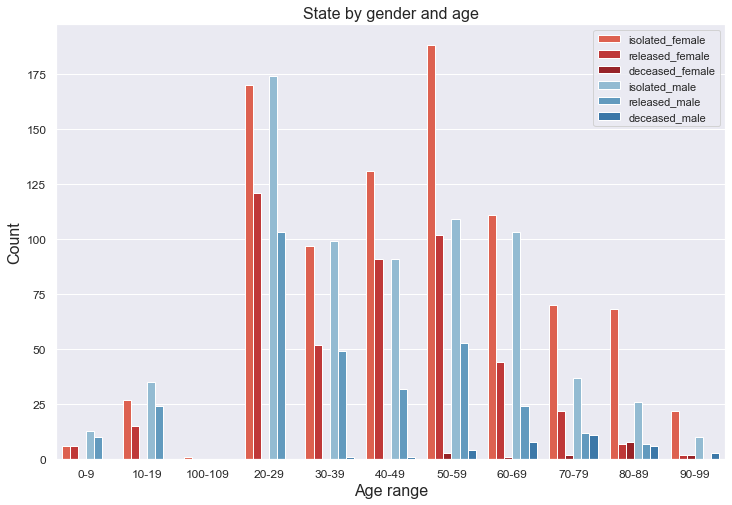

In [48]:
age_gender_hue_order =["isolated_female", "released_female", "deceased_female",
                       "isolated_male", "released_male", "deceased_male"]
custom_palette = sns.color_palette("Reds")[3:6] + sns.color_palette("Blues")[2:5]

plt.figure(figsize=(12, 8))
sns.countplot(x = "age_range",
              hue="state_by_gender",
              order=age_ranges,
              hue_order=age_gender_hue_order,
              palette=custom_palette,
              data=patient)
plt.title("State by gender and age", fontsize=16)
plt.xlabel("Age range", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right")
plt.show()